# **IMPORTADO DE MÓDULOS**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions import (Calculate_CFD, create_position, plot_gaussian, get_gaussian_params,
                       interpolate_pulses, calculate_gaussian_center_sigma)

In [3]:
# Load data 
dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'
test_data = np.load(os.path.join(dir, 'Na22_test_val.npz'))['data']

EXTRASAMPLING = 8
new_data, new_time_step =  interpolate_pulses(test_data, EXTRASAMPLING = 8, time_step = 0.2)

# Align the pulses 
align_steps = 20
new_data[:, :, 1] = np.roll(new_data[:, :, 1], align_steps)
new_data[:, :align_steps, 1] = np.random.normal(scale = 1e-6, size = align_steps)

# **CFD**

In [4]:
fraction = 0.5
shift = 80
t_shift = 8
time_step = 0.2
threshold = 0.025
new_time_step = time_step / EXTRASAMPLING

In [5]:
DATA_00 = new_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift, NOISE = False)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift, NOISE = False)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift), NOISE = False)
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift), NOISE = False)

# **FULL TOF**

In [6]:
timestamps_dec0_DATA_00 = Calculate_CFD(DATA_00[:, :, 0], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)
timestamps_dec1_DATA_00 = Calculate_CFD(DATA_00[:, :, 1], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)

timestamps_dec0_DATA_02 = Calculate_CFD(DATA_02[:, :, 0], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)
timestamps_dec1_DATA_02 = Calculate_CFD(DATA_02[:, :, 1], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)

timestamps_dec0_DATA_20 = Calculate_CFD(DATA_20[:, :, 0], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)
timestamps_dec1_DATA_20 = Calculate_CFD(DATA_20[:, :, 1], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)

timestamps_dec0_DATA_04 = Calculate_CFD(DATA_04[:, :, 0], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)
timestamps_dec1_DATA_04 = Calculate_CFD(DATA_04[:, :, 1], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)

timestamps_dec0_DATA_40 = Calculate_CFD(DATA_40[:, :, 0], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)
timestamps_dec1_DATA_40 = Calculate_CFD(DATA_40[:, :, 1], fraction = fraction, shift = shift, threshold = threshold, time_step = new_time_step)

V40: CENTROID(ns) = 0.3991 +/- 0.00098  FWHM(ns) = 0.2316 +/- 0.00105
V20: CENTROID(ns) = 0.1993 +/- 0.00075  FWHM(ns) = 0.2321 +/- 0.00080
V00: CENTROID(ns) = -0.0007 +/- 0.00103  FWHM(ns) = 0.2323 +/- 0.00111
V02: CENTROID(ns) = -0.2009 +/- 0.00096  FWHM(ns) = 0.2314 +/- 0.00103
V04: CENTROID(ns) = -0.4007 +/- 0.00096  FWHM(ns) = 0.2321 +/- 0.00104



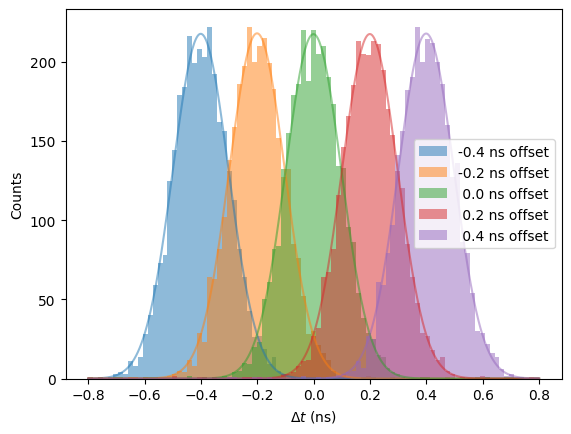

In [7]:
TOF_V00 = timestamps_dec0_DATA_00 - timestamps_dec1_DATA_00
TOF_V02 = timestamps_dec0_DATA_02 - timestamps_dec1_DATA_02
TOF_V20 = timestamps_dec0_DATA_20 - timestamps_dec1_DATA_20
TOF_V04 = timestamps_dec0_DATA_04 - timestamps_dec1_DATA_04
TOF_V40 = timestamps_dec0_DATA_40 - timestamps_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
nbins = 91
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [8]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + new_time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - new_time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*new_time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*new_time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)          

0.08871245076753417
